In [2]:
def sum(*a): 
    result = 0 
    for i in a: 
        result = result + i 
    return result 

res = sum(12, 678, 345, 7890, 78, 23, 12, 45, 890) 
print(res) 

9973


In [1]:
name = 'Kyle Tong'
reverse = name[::-1]
print(reverse)

gnoT elyK


In [15]:
#If you only want to extract positive integers, try the following:
str = "h3110 23 cat 444.4 rabbit 11 2 dog"
[int(s) for s in str.split() if s.isdigit()]


[23, 11, 2]

In [2]:
import re

# Format is [(<string>, <expected output>), ...]
ss = [("apple-12.34 ba33na fanc-14.23e-2yapple+45e5+67.56E+3",
       ['-12.34', '33', '-14.23e-2', '+45e5', '+67.56E+3']),
      ('hello X42 I\'m a Y-32.35 string Z30',
       ['42', '-32.35', '30']),
      ('he33llo 42 I\'m a 32 string -30', 
       ['33', '42', '32', '-30']),
      ('h3110 23 cat 444.4 rabbit 11 2 dog', 
       ['3110', '23', '444.4', '11', '2']),
      ('hello 12 hi 89', 
       ['12', '89']),
      ('4', 
       ['4']),
      ('I like 74,600 commas not,500', 
       ['74,600', '500']),
      ('I like bad math 1+2=.001', 
       ['1', '+2', '.001'])]

for s, r in ss:
    rr = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", s)
    if rr == r:
        print('GOOD')
    else:
        print('WRONG', rr, 'should be', r)


GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD


In [3]:
s = 'hello world3 it is now 5pm'
numbers = re.findall('[0-9]+', s)
print(numbers)

['3', '5']


In [41]:
def reverse(text):
    return text[::-1]
    
name = "Anh is my sister."
print(reverse(name))

.retsis ym si hnA


To create a random sequence of ATCG, use this:

In [3]:
import random
"".join([random.choice('ACGT') for i in range(100)])

'ACAAAGAGCATCGAAGGGTCATCTTAGGGGTTTCTGTTACTAGGTAACCTTTTACGGTCCAGATGGTTTACTAAGTGCATGTCTTGTACAACTTTTCAAC'

In [42]:
seq = "".join([random.choice('ACGT') for i in range(1000)]) 

In [45]:
seq ='TTGCGGAGGTCTCCAACCGTTGCTATGTAAAAA'

In [44]:
print(reverse(seq))

TTGCGGAGGTCTCCAACCGTTGCTATGTAAAAACGCTGACAGAGGATTATTCGCGAAACATTATAAATGGTTATGGTTAGTCGCTTATGTGCCCCTCAACACCTGACACGTAGCTTATAGGAAGCCCGTATTTGTTGTAATGCTAGAGGTCGCAGCGAAGCCGTGGTCTCGCCCACAAGTGTAGATGAGTCGTGCTTTACACGATAATCGTGCGCTCGATTAATGACTTAATTATAAACACGCCGACGTTCAGTGCGTTCCCTCTCGTATGGGAGACGGAATCGGTGATTAGAATTCCCATGACAAAACGCAGAGAGACACTCGATCGCGGCCAAGTACGTAGATAGCCAGTAGGGGGTTATCTTTATCAATTGTGGCCGTTATGAAGACCGAGTTTTTAAGTCGCATTGCATACTCAAAAGCACTTGACATATTCCAGCCTCAGTAGTTAAATGGAAGCATGCAGGATGAGTCGAAGAGCGCCCGCTTCTTCGCGGGAAGGAAGCCCTTAGTAAGCATGCAACGCATCGCAGCGATGTAGATCGAGTGCTTTATGAAGCATTCGCGGCACCCTTTCCTACTTGTCCACGGGGATAGACTTGGTGCCAGAAACGGGCTCCGATTATATAACGAACAGTGAAATGCTTTCGTGGAGTAAGATTGTCGGTCCGCCTAACTGCCACGCCGGGTGTACGGCTACATTTTCACTATCGGTATTGACCAAGTGCTTGGGGACATATCTATTCAACAATACAGCCGCGGAAGGCGTTAGTCGCCCTTGCTGCACTAGCGTTATCTGTCAAGTGCGTTCCTAGATGGTTCCTCCCGCATTAGTCTGGATCCTGGCCCGATTGTAAATCCGACGTTTCACATGTACGCCAATGAGTCAGTCAGGCTGGAACGACGGATTACCTACACACAAGTCAAGGTCACATTGACCTAAACTCCATTGTAGCCCTTGCCGTTAACAGGACGCAAGTAGCTTAAAATCAACATGGAG

Next task would be to replace A with T, T with A, and same between G and C (basically to replace with complement). With my reverse code, i will end up with the reverse complement!!

In [35]:
#Replace with complement base

def compl(seq, dic):
    dic = {"A":"T", "T":"A", "C":"G", "G":"C"}
    for i,j in dic.items():
        seq = seq.replace(i, j)
        return seq
# for i, j in dic.items():
#     print(i, j)

In [36]:
print(compl(seq, dic)) # Does not work as i wish...this is not doing what i want.

TTTTTTTT


In [37]:
#The following works, though i do not know exactly understand it:
#https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string
import re
def multiple_replace(string, rep_dict):
    pattern = re.compile("|".join([re.escape(k) for k in sorted(rep_dict,key=len,reverse=True)]), flags=re.DOTALL)
    return pattern.sub(lambda x: rep_dict[x.group(0)], string)

In [46]:
print(multiple_replace(seq, dic))

AACGCCTCCAGAGGTTGGCAACGATACATTTTT


Now combine both reverse and complementary into one code

In [47]:
import re
def rev_comp(string, rep_dict):
    pattern = re.compile("|".join([re.escape(k) for k in sorted(rep_dict,key=len,reverse=True)]), flags=re.DOTALL)
    return pattern.sub(lambda x: rep_dict[x.group(0)], string)[::-1]

In [48]:
seq

'TTGCGGAGGTCTCCAACCGTTGCTATGTAAAAA'

In [49]:
dic = {"A":"T", "T":"A", "C":"G", "G":"C"}

In [50]:
print(rev_comp(seq,dic))

TTTTTACATAGCAACGGTTGGAGACCTCCGCAA


###############################################################################################
to extract information from a website

In [8]:
#to extract information from a website
import requests
url = 'https://ftp.ncbi.nlm.nih.gov/refseq/special_requests/taxid2speciesname'
response = requests.get(url)
print(response.status_code)

200


In [12]:
#print(response.text)
for i in (response.text).splitlines(): #without the splitlines() it returns nothing.
    if "Prunus" in i:
        print(i)

3755	Prunus dulcis	almond
3760	Prunus persica	peach
42229	Prunus avium	sweet cherry
102107	Prunus mume	Japanese apricot


#################################################################################################
Following this tutorial: https://www.youtube.com/watch?v=FXhED53VZ50&list=PLCN-JplaYuP4gDPNweg-bbGwNL36A3Hog&index=52&t=887s
Also see this: http://apmonitor.com/che263/index.php/Main/PythonDataAnalysis

In [4]:
import pandas as pd
data = pd.read_csv("apmonitor_data.csv")

In [5]:
data.head()

,time,s1,s2,s3,s4,s5,s6,s7,s8
0,1.398489e+09,406.821114,414.7304,373.126443,375.749231,NaN,NaN,NaN,NaN
1,1.398489e+09,393.779605,390.7304,363.568921,365.364615,NaN,NaN,NaN,NaN
2,1.398489e+09,370.956963,378.7304,360.383080,358.441538,NaN,NaN,NaN,NaN
3,1.398489e+09,362.806020,378.7304,360.383080,353.249231,NaN,NaN,NaN,NaN
4,1.398489e+09,369.326774,390.7304,363.568921,358.441538,NaN,NaN,NaN,NaN


In [7]:
#data.dtypes

In [8]:
time = data['time']

In [9]:
time.head()

0    1.398489e+09
1    1.398489e+09
2    1.398489e+09
3    1.398489e+09
4    1.398489e+09
Name: time, dtype: float64

In [13]:
sensors = data.loc[:,'s1':'s4'] #note the first : in the squared brackets means all rows.

In [15]:
sensors.head()

,s1,s2,s3,s4
0,406.821114,414.7304,373.126443,375.749231
1,393.779605,390.7304,363.568921,365.364615
2,370.956963,378.7304,360.383080,358.441538
3,362.806020,378.7304,360.383080,353.249231
4,369.326774,390.7304,363.568921,358.441538


In [16]:
#to substract the first time value from all time values:
time = time - time[0]

In [17]:
time.head()

0    0.000
1    0.999
2    2.986
3    5.856
4    6.855
Name: time, dtype: float64

In [19]:
#calculate the average of rows and columns:
import numpy as np
avg_row = np.mean(sensors, 1)
avg_col = np.mean(sensors, 0)
print(avg_row[:3])
print(avg_col[:3])

0    392.606797
1    378.360885
2    367.127995
dtype: float64
s1    382.153393
s2    391.840400
s3    364.279629
dtype: float64


In [27]:
#concatenate all the data together, putting the average values for each row on the right side of the sensors columns
my_data = [time, sensors, avg_row]
result = pd.concat(my_data, axis=1) #the axis 1 here means to put all 3 things stacked column wise from left to right.
#the axis = 0 would mean to stack the data row wise, on top of each other.
result.head()

,time,s1,s2,s3,s4,0
0,0.000,406.821114,414.7304,373.126443,375.749231,392.606797
1,0.999,393.779605,390.7304,363.568921,365.364615,378.360885
2,2.986,370.956963,378.7304,360.383080,358.441538,367.127995
3,5.856,362.806020,378.7304,360.383080,353.249231,363.792183
4,6.855,369.326774,390.7304,363.568921,358.441538,370.516908


In [32]:
#rename the column 0:
result = result.rename({0:'average'}, axis='columns') #here axis =1 would have worked too
result.head()

,time,s1,s2,s3,s4,average
0,0.000,406.821114,414.7304,373.126443,375.749231,392.606797
1,0.999,393.779605,390.7304,363.568921,365.364615,378.360885
2,2.986,370.956963,378.7304,360.383080,358.441538,367.127995
3,5.856,362.806020,378.7304,360.383080,353.249231,363.792183
4,6.855,369.326774,390.7304,363.568921,358.441538,370.516908


In [23]:
#Can save the new dataframe (or can this be called a numpy array too?), using different possible routes:
result.to_csv("result.csv")
#result.to_excel("result.xlsx") #this one might need a module called 'openpyxl'
result.to_html("result.htm")
#result.to_clipboard() #check why this doesn't work...?

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/thuy/learning.python/my_venv/thuy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'S' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/home/thuy/learning.python/my_venv/thuy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/home/thuy/learning.python/my_venv/thuy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  

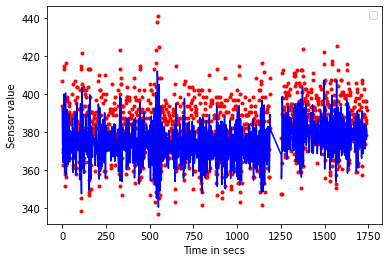

In [38]:
plt.figure(1)
plt.plot(time, sensors['s1'], 'r.')
plt.plot(time, result['average'], 'b-') #here could have also done: plt.plot(time, avg_row, 'b-')
plt.legend('Sensor 1', 'Sensors average')
plt.xlabel('Time in secs')
plt.ylabel('Sensor value')
#plt.savefig('apmonitor_plot.png')
plt.show()